**OBJECTIVE -  Import the “Raw_Data_Singapore Credit Dataset” file, and run it through the logistic
regression algo to predict the default.**

**IMPORTING LIBRARIES**

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**DATA COLLECTION AND CLEANING**

In [4]:
df=pd.read_csv(r"D:\MLCOE\task2\classification.csv")
df

,checking_balance,months_loan_duration,credit_history,purpose,amount,savings_balance,employment_duration,percent_of_income,years_at_residence,age,other_credit,housing,existing_loans_count,job,dependents,phone,default
0,< 0 SGD,6,critical,furniture/appliances,1169,unknown,> 7 years,4,4,67,none,own,2,skilled,1,yes,no
1,1 - 200 SGD,48,good,furniture/appliances,5951,< 100 SGD,1 - 4 years,2,2,22,none,own,1,skilled,1,no,yes
2,unknown,12,critical,education,2096,< 100 SGD,4 - 7 years,2,3,49,none,own,1,unskilled,2,no,no
3,< 0 SGD,42,good,furniture/appliances,7882,< 100 SGD,4 - 7 years,2,4,45,none,other,1,skilled,2,no,no
4,< 0 SGD,24,poor,car,4870,< 100 SGD,1 - 4 years,3,4,53,none,other,2,skilled,2,no,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,unknown,12,good,furniture/appliances,1736,< 100 SGD,4 - 7 years,3,4,31,none,own,1,unskilled,1,no,no
996,< 0 SGD,30,good,car,3857,< 100 SGD,1 - 4 years,4,4,40,none,own,1,management,1,yes,no
997,unknown,12,good,furniture/appliances,804,< 100 SGD,> 7 years,4,4,38,none,own,1,skilled,1,no,no
998,< 0 SGD,45,good,furniture/appliances,1845,< 100 SGD,1 - 4 years,4,4,23,none,other,1,skilled,1,yes,yes


**Finding Null values**

In [5]:
df.isnull().sum()

checking_balance        0
months_loan_duration    0
credit_history          0
purpose                 0
amount                  0
savings_balance         0
employment_duration     0
percent_of_income       0
years_at_residence      0
age                     0
other_credit            0
housing                 0
existing_loans_count    0
job                     0
dependents              0
phone                   0
default                 0
dtype: int64

In [7]:
df.columns

Index(['checking_balance', 'months_loan_duration', 'credit_history', 'purpose',
       'amount', 'savings_balance', 'employment_duration', 'percent_of_income',
       'years_at_residence', 'age', 'other_credit', 'housing',
       'existing_loans_count', 'job', 'dependents', 'phone', 'default'],
      dtype='object')

In [6]:
df.shape

(1000, 17)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   checking_balance      1000 non-null   object
 1   months_loan_duration  1000 non-null   int64 
 2   credit_history        1000 non-null   object
 3   purpose               1000 non-null   object
 4   amount                1000 non-null   int64 
 5   savings_balance       1000 non-null   object
 6   employment_duration   1000 non-null   object
 7   percent_of_income     1000 non-null   int64 
 8   years_at_residence    1000 non-null   int64 
 9   age                   1000 non-null   int64 
 10  other_credit          1000 non-null   object
 11  housing               1000 non-null   object
 12  existing_loans_count  1000 non-null   int64 
 13  job                   1000 non-null   object
 14  dependents            1000 non-null   int64 
 15  phone                 1000 non-null   o

In [8]:
df.describe()

,months_loan_duration,amount,percent_of_income,years_at_residence,age,existing_loans_count,dependents
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,20.903000,3271.258000,2.973000,2.845000,35.546000,1.407000,1.155000
std,12.058814,2822.736876,1.118715,1.103718,11.375469,0.577654,0.362086
min,4.000000,250.000000,1.000000,1.000000,19.000000,1.000000,1.000000
25%,12.000000,1365.500000,2.000000,2.000000,27.000000,1.000000,1.000000
50%,18.000000,2319.500000,3.000000,3.000000,33.000000,1.000000,1.000000
75%,24.000000,3972.250000,4.000000,4.000000,42.000000,2.000000,1.000000
max,72.000000,18424.000000,4.000000,4.000000,75.000000,4.000000,2.000000


In [7]:
df.dtypes

checking_balance        object
months_loan_duration     int64
credit_history          object
purpose                 object
amount                   int64
savings_balance         object
employment_duration     object
percent_of_income        int64
years_at_residence       int64
age                      int64
other_credit            object
housing                 object
existing_loans_count     int64
job                     object
dependents               int64
phone                   object
default                 object
dtype: object

**EXPLORATORY DATA ANALYSIS**

In [10]:
# target variable

default_counts=df['default'].value_counts()
default_counts

default
no     700
yes    300
Name: count, dtype: int64

In [12]:
credit_history_counts=df['credit_history'].value_counts()
credit_history_counts

credit_history
good         530
critical     293
poor          88
very good     49
perfect       40
Name: count, dtype: int64

In [14]:
#counting
df['checking_balance'].value_counts()

checking_balance
unknown        394
< 0 SGD        274
1 - 200 SGD    269
> 200 SGD       63
Name: count, dtype: int64

In [15]:
df['savings_balance'].value_counts()

savings_balance
< 100 SGD         603
unknown           183
100 - 500 SGD     103
500 - 1000 SGD     63
> 1000 SGD         48
Name: count, dtype: int64

In [16]:
years_at_residence_counts=df['years_at_residence'].value_counts()
years_at_residence_counts

years_at_residence
4    413
2    308
3    149
1    130
Name: count, dtype: int64

<Axes: xlabel='credit_history', ylabel='count'>

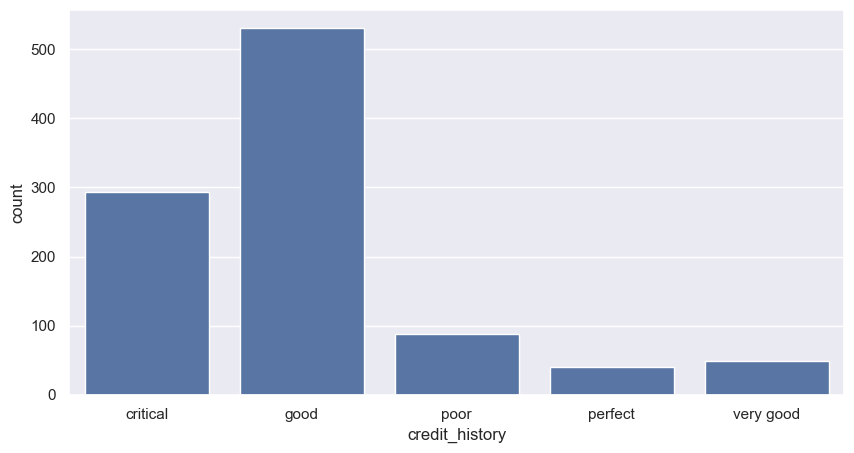

In [18]:
#Count plot
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='credit_history',data=df)

<Axes: xlabel='employment_duration', ylabel='count'>

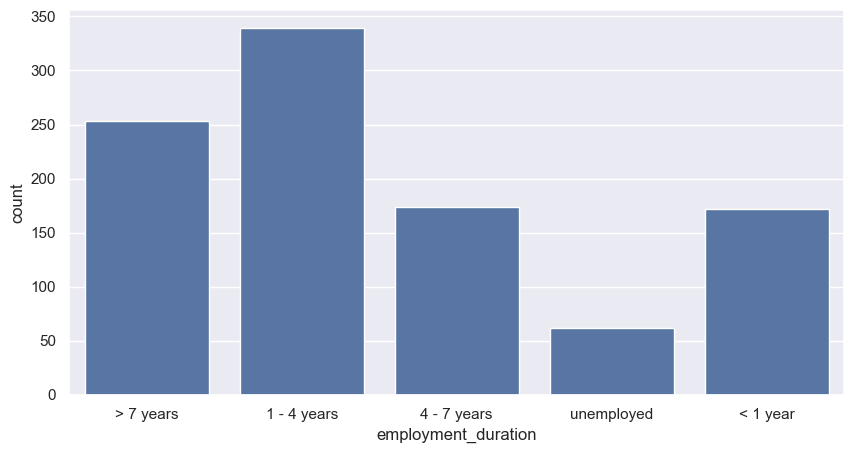

In [19]:
sns.set(rc={'figure.figsize':(10,5)})
sns.countplot(x='employment_duration',data=df)

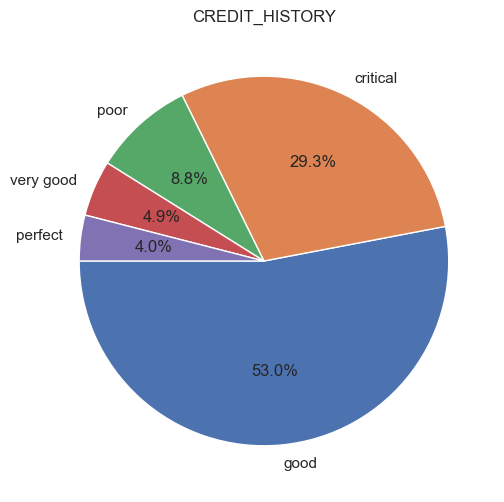

In [21]:
plt.figure(figsize=(12,6))
plt.title("CREDIT_HISTORY")
plt.pie(credit_history_counts, labels=credit_history_counts.index, autopct='%1.1f%%', startangle=180);

**TRAIN TEST SPLIT**